/tmp/ipykernel_14669/1632026841.py:39: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  ax2.contourf(x, y, z, zdir='z', offset=-0.15, cmap=cm.viridis)


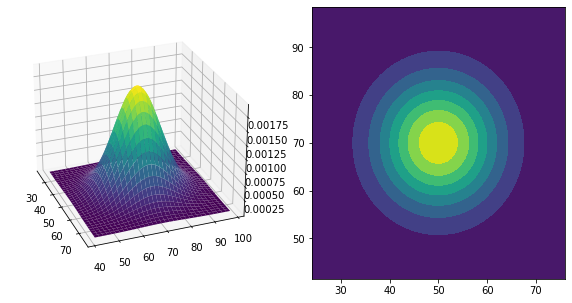

In [31]:
import numpy as np
import pdb
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


def gauss2d(mu, sigma, to_plot=False):
    w, h = 100, 100

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z = z.reshape(w, h, order='F')

    if to_plot:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(1,2,1, projection='3d')
        ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)


        # cset = ax.contourf(x, y, z.T, zdir='z', offset=-0.15, cmap=cm.viridis)
        #cset = ax.contourf(x, y, z.T, offset=-0.15, cmap=cm.viridis)
        #ax.set_zlim(-0.15,0.2)
        #ax.set_zticks(np.linspace(0,0.2,5))
        ax.view_init(27, -21)
        # plt.contourf(x, y, z.T)
        ax2 = fig.add_subplot(1,2,2)
        ax2.contourf(x, y, z, zdir='z', offset=-0.15, cmap=cm.viridis)
        plt.savefig("2d-gaussian.pdf")
        plt.show()
        
        

    return z


MU = [50, 70]
SIGMA = [75.0, 90.0]
z = gauss2d(MU, SIGMA, True)